# Analyzing NYC's 311 Street Flooding Complaints from 2010 to 2020
## An Interactive Notebook Provided By MyBinder

Mark Bauer

# Goal

To run this notebook interactively through your browser (note: I am using Chrome). This is provided by  [mybinder.org](https://mybinder.org/). Additionally, this notebook demonstrates how to inspect and preview our data before we begin analysis.

# Main Python Libraries
[pandas](https://pandas.pydata.org/) is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.

[Seaborn](https://seaborn.pydata.org/index.html) is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

# Datasets

## Name:  311 Service Requests from 2010 to Present  
Website: https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9

311's data dictionary can be found in the [data-dictionaries](https://github.com/mebauer/nyc-311-street-flooding/tree/main/data-dictionaries) folder. 

![311](../images/nyc-311-screenshot.png)

Table of Contents
=================

   * 1. Importing Libraries
       
   * 2. Loading Data
       
   * 3. Data Inspection
       * 3.1 Basic Data Inspection
       * 3.2 Calculating Summary Statistics
       * 3.3 Identifying Null Values
       * 3.4 Inspecting Items In Each Column
        
   * 4. Conclusion

# 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['savefig.facecolor'] = 'white'
%matplotlib inline

Printing versions of Python modules and packages with **watermark** - the IPython magic extension.

In [2]:
%reload_ext watermark
%watermark -v -p numpy,pandas,seaborn,matplotlib

Python implementation: CPython
Python version       : 3.8.13
IPython version      : 8.4.0

numpy     : 1.23.1
pandas    : 1.4.3
seaborn   : 0.11.2
matplotlib: 3.5.2



Documention for installing watermark: https://github.com/rasbt/watermark

# 2. Loading Data

In [3]:
# list items in data folder
%ls ../data/

README.md                       street-flooding-query.csv
street-flooding-complaints.csv  streets-clipped.gpkg


In [4]:
# read data as a dataframe
path = '../data/street-flooding-complaints.csv'
df = pd.read_csv(path, low_memory=False)

# previewing first five rows in data
df.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,incident_zip,incident_address,street_name,...,community_board,bbl,borough,x_coordinate_state_plane,y_coordinate_state_plane,open_data_channel_type,park_borough,latitude,longitude,location
0,45283755,2019-12-31T22:42:00.000,2020-01-07T11:07:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),10306.0,131 GRIMSBY STREET,GRIMSBY STREET,...,02 STATEN ISLAND,5.037950e+09,STATEN ISLAND,958363.0,148793.0,ONLINE,STATEN ISLAND,40.575041,-74.093186,"{'latitude': '40.57504060779978', 'longitude':..."
1,45283863,2019-12-31T17:34:00.000,2020-01-01T15:45:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),10312.0,NaN,NaN,...,03 STATEN ISLAND,NaN,STATEN ISLAND,937878.0,143517.0,PHONE,STATEN ISLAND,40.560476,-74.166889,"{'latitude': '40.56047555908232', 'longitude':..."
2,45279400,2019-12-31T16:11:00.000,2020-01-08T10:10:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),10305.0,753 QUINCY AVENUE,QUINCY AVENUE,...,02 STATEN ISLAND,5.038260e+09,STATEN ISLAND,960864.0,149333.0,PHONE,STATEN ISLAND,40.576530,-74.084185,"{'latitude': '40.576529751013474', 'longitude'..."
3,45277773,2019-12-31T15:42:00.000,2020-01-01T05:25:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),11379.0,61-21 70 STREET,70 STREET,...,05 QUEENS,4.029270e+09,QUEENS,1015410.0,201741.0,PHONE,QUEENS,40.720354,-73.887589,"{'latitude': '40.72035428730757', 'longitude':..."
4,45282532,2019-12-31T12:18:00.000,2019-12-31T14:15:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),11375.0,NaN,NaN,...,06 QUEENS,NaN,QUEENS,1027498.0,202160.0,PHONE,QUEENS,40.721454,-73.843978,"{'latitude': '40.721453503515995', 'longitude'..."


In [5]:
# previewing the last five rows of our dataframe
df.tail()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,incident_zip,incident_address,street_name,...,community_board,bbl,borough,x_coordinate_state_plane,y_coordinate_state_plane,open_data_channel_type,park_borough,latitude,longitude,location
24812,15668560,2010-01-05T10:37:00.000,2010-01-08T09:00:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),11234.0,2330 EAST 63 STREET,EAST 63 STREET,...,18 BROOKLYN,3.086550e+09,BROOKLYN,1009324.0,162441.0,UNKNOWN,BROOKLYN,40.612504,-73.909690,"{'latitude': '40.612503941061355', 'longitude'..."
24813,15655327,2010-01-04T16:47:00.000,2010-01-12T10:35:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),11428.0,94-18 218 STREET,218 STREET,...,13 QUEENS,4.106210e+09,QUEENS,1056756.0,201721.0,UNKNOWN,QUEENS,40.720057,-73.738432,"{'latitude': '40.72005714131501', 'longitude':..."
24814,15640664,2010-01-02T17:45:00.000,2010-01-12T11:00:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),11436.0,116-14 146 STREET,146 STREET,...,12 QUEENS,4.120050e+09,QUEENS,1041026.0,187595.0,UNKNOWN,QUEENS,40.681400,-73.795297,"{'latitude': '40.68139962026673', 'longitude':..."
24815,15640572,2010-01-02T12:00:00.000,2010-01-02T15:12:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),10302.0,NaN,NaN,...,01 STATEN ISLAND,NaN,STATEN ISLAND,944481.0,171989.0,UNKNOWN,STATEN ISLAND,40.638657,-74.143293,"{'latitude': '40.63865739388004', 'longitude':..."
24816,15639934,2010-01-02T08:26:00.000,2010-01-03T08:45:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),11229.0,39 DARE COURT,DARE COURT,...,15 BROOKLYN,3.089000e+09,BROOKLYN,1005975.0,153432.0,UNKNOWN,BROOKLYN,40.587785,-73.921781,"{'latitude': '40.58778491597503', 'longitude':..."


In [6]:
# shape of data
print(df.shape)

(24817, 27)


# 3. Data Inspection

## 3.1 Basic Data Inspection

In [7]:
# the object's type
type(df)

pandas.core.frame.DataFrame

In [8]:
# printing the data types of our columns
df.dtypes

unique_key                          int64
created_date                       object
closed_date                        object
agency                             object
agency_name                        object
complaint_type                     object
descriptor                         object
incident_zip                      float64
incident_address                   object
street_name                        object
cross_street_1                     object
cross_street_2                     object
address_type                       object
city                               object
status                             object
resolution_description             object
resolution_action_updated_date     object
community_board                    object
bbl                               float64
borough                            object
x_coordinate_state_plane          float64
y_coordinate_state_plane          float64
open_data_channel_type             object
park_borough                      

In [9]:
# printing the column names, non-null counts, and data types of our columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24817 entries, 0 to 24816
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   unique_key                      24817 non-null  int64  
 1   created_date                    24817 non-null  object 
 2   closed_date                     24815 non-null  object 
 3   agency                          24817 non-null  object 
 4   agency_name                     24817 non-null  object 
 5   complaint_type                  24817 non-null  object 
 6   descriptor                      24817 non-null  object 
 7   incident_zip                    24817 non-null  float64
 8   incident_address                16002 non-null  object 
 9   street_name                     16002 non-null  object 
 10  cross_street_1                  21821 non-null  object 
 11  cross_street_2                  21816 non-null  object 
 12  address_type                    

In [10]:
# counts of unique values of our datatypes 
df.dtypes.value_counts()

object     20
float64     6
int64       1
dtype: int64

In [11]:
# printing True/False if column is unique on our unique key
df['unique_key'].is_unique

True

In [12]:
df['descriptor'].value_counts()

Street Flooding (SJ)    24817
Name: descriptor, dtype: int64

In [13]:
df['agency'].value_counts()

DEP    24817
Name: agency, dtype: int64

In [14]:
df['agency_name'].value_counts()

Department of Environmental Protection    24817
Name: agency_name, dtype: int64

In [15]:
df['complaint_type'].value_counts()

Sewer    24817
Name: complaint_type, dtype: int64

In [16]:
df['status'].value_counts()

Closed      24815
Assigned        1
Started         1
Name: status, dtype: int64

In [17]:
(df['resolution_description']
 .value_counts()
 .reset_index()
 .head()
)

,index,resolution_description
0,The Department of Environment Protection inspe...,9193
1,Please call 311 for further information. If yo...,4489
2,The Department of Environmental Protection ins...,2852
3,The Department of Environmental Protection inv...,2377
4,The Department of Environmental Protection has...,1319


In [18]:
print('Top 10 Resolution Descriptions in Descending Order:\n')

for i in range(10):
    print(str(i + 1) + '.', \
          df['resolution_description'].value_counts().index[i], \
          '\nCount: ' \
          f"{df['resolution_description'].value_counts()[i]:,}\n")

Top 10 Resolution Descriptions in Descending Order:

1. The Department of Environment Protection inspected your complaint but could not find the problem you reported. If the condition persists, please call 311 (or 212-639-9675 if calling from a non-New York City area code) with more detailed information to submit a new complaint. 
Count: 9,193

2. Please call 311 for further information. If you are outside of New York City, please call (212) NEW-YORK (212-639-9675). 
Count: 4,489

3. The Department of Environmental Protection inspected your complaint and referred it to the Department of Transportation for further action. If the problem persists, please call 311 (or 212-639-9675 if calling from a non-New York City area code) to submit a new complaint. 
Count: 2,852

4. The Department of Environmental Protection investigated this complaint and resolved the street flooding. 
Count: 2,377

5. The Department of Environmental Protection has determined that this issue was previously reported 

In [19]:
# date min
df.created_date.min()

'2010-01-02T08:26:00.000'

In [20]:
# date max
df.created_date.max()

'2019-12-31T22:42:00.000'

In [21]:
date_min = df.created_date.min()[0:10]
date_max = df.created_date.max()[0:10]

print('This dataset is from {} to {}.'.format(date_min, date_max))

This dataset is from 2010-01-02 to 2019-12-31.


## 3.2 Calcualting Summary Statistics

In [22]:
# printing descriptive statistics of our numeric columns in our data
df.describe()

,unique_key,incident_zip,bbl,x_coordinate_state_plane,y_coordinate_state_plane,latitude,longitude
count,2.481700e+04,24817.000000,1.460300e+04,2.481700e+04,24817.000000,24817.000000,24817.000000
mean,3.129858e+07,10965.266914,3.712649e+09,1.005282e+06,185921.310432,40.676892,-73.924100
std,8.463767e+06,540.043818,1.079234e+09,3.529875e+04,30616.220119,0.084035,0.127214
min,1.563993e+07,10001.000000,0.000000e+00,9.133570e+05,121032.000000,40.498628,-74.254937
25%,2.388025e+07,10312.000000,3.063260e+09,9.865360e+05,160993.000000,40.608412,-73.991761
50%,3.165438e+07,11221.000000,4.071170e+09,1.007456e+06,183284.000000,40.669620,-73.916348
75%,3.904387e+07,11411.000000,4.157320e+09,1.034095e+06,206491.000000,40.733373,-73.820150
max,4.852609e+07,11697.000000,5.080500e+09,1.067038e+06,271876.000000,40.912869,-73.701229


In [23]:
df.describe(include=['O']).T

,count,unique,top,freq
created_date,24817,23556,2011-08-28T00:00:00.000,12
closed_date,24815,22563,2017-05-06T08:30:00.000,34
agency,24817,1,DEP,24817
agency_name,24817,1,Department of Environmental Protection,24817
complaint_type,24817,1,Sewer,24817
descriptor,24817,1,Street Flooding (SJ),24817
incident_address,16002,11240,133-25 FRANCIS LEWIS BOULEVARD,59
street_name,16002,3874,BROADWAY,105
cross_street_1,21821,4364,BEND,296
cross_street_2,21816,4382,DEAD END,452


In [24]:
# printing descriptive statistics of our numeric columns in our data
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
unique_key,24817.0,NaN,NaN,NaN,31298575.976266,8463766.713426,15639934.0,23880247.0,31654383.0,39043869.0,48526090.0
created_date,24817,23556,2011-08-28T00:00:00.000,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
closed_date,24815,22563,2017-05-06T08:30:00.000,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
agency,24817,1,DEP,24817,NaN,NaN,NaN,NaN,NaN,NaN,NaN
agency_name,24817,1,Department of Environmental Protection,24817,NaN,NaN,NaN,NaN,NaN,NaN,NaN
complaint_type,24817,1,Sewer,24817,NaN,NaN,NaN,NaN,NaN,NaN,NaN
descriptor,24817,1,Street Flooding (SJ),24817,NaN,NaN,NaN,NaN,NaN,NaN,NaN
incident_zip,24817.0,NaN,NaN,NaN,10965.266914,540.043818,10001.0,10312.0,11221.0,11411.0,11697.0
incident_address,16002,11240,133-25 FRANCIS LEWIS BOULEVARD,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN
street_name,16002,3874,BROADWAY,105,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# compute pairwise correlation of columns, excluding NA/null values
df.corr()

,unique_key,incident_zip,bbl,x_coordinate_state_plane,y_coordinate_state_plane,latitude,longitude
unique_key,1.000000,0.024882,-0.010929,0.014510,0.022053,0.022055,0.014512
incident_zip,0.024882,1.000000,0.125336,0.708516,-0.097877,-0.098335,0.708151
bbl,-0.010929,0.125336,1.000000,-0.205561,-0.583355,-0.583845,-0.205524
x_coordinate_state_plane,0.014510,0.708516,-0.205561,1.000000,0.460252,0.459604,0.999999
y_coordinate_state_plane,0.022053,-0.097877,-0.583355,0.460252,1.000000,0.999999,0.460856
latitude,0.022055,-0.098335,-0.583845,0.459604,0.999999,1.000000,0.460207
longitude,0.014512,0.708151,-0.205524,0.999999,0.460856,0.460207,1.000000


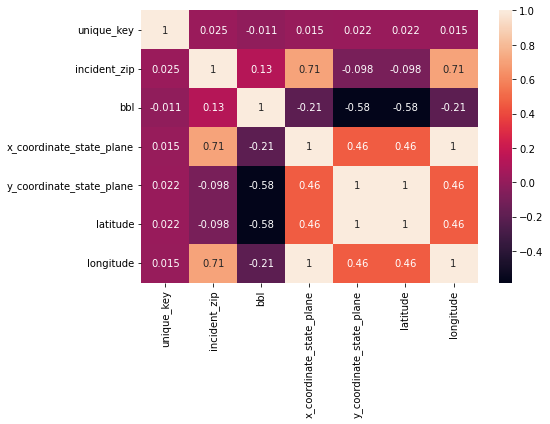

In [26]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.heatmap(
    df.corr(), 
    annot=True, 
    ax=ax
)

plt.tight_layout()

## 3.3 Identifying Null Values

In [27]:
print('Sum of nulls in column:')
(df
 .isnull()
 .sum()
 .sort_values(ascending=False)
)

Sum of nulls in column:


bbl                               10214
incident_address                   8815
street_name                        8815
cross_street_2                     3001
cross_street_1                     2996
resolution_description                4
closed_date                           2
unique_key                            0
community_board                       0
longitude                             0
latitude                              0
park_borough                          0
open_data_channel_type                0
y_coordinate_state_plane              0
x_coordinate_state_plane              0
borough                               0
city                                  0
resolution_action_updated_date        0
status                                0
created_date                          0
address_type                          0
incident_zip                          0
descriptor                            0
complaint_type                        0
agency_name                           0


In [28]:
print('Sum of nulls in all columns:')
df.isnull().sum().sum()

Sum of nulls in all columns:


33847

In [29]:
print('Identifying nulls in column (True/False):')
df.isnull().head()

Identifying nulls in column (True/False):


,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,incident_zip,incident_address,street_name,...,community_board,bbl,borough,x_coordinate_state_plane,y_coordinate_state_plane,open_data_channel_type,park_borough,latitude,longitude,location
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,True,...,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,True,...,False,True,False,False,False,False,False,False,False,False


In [30]:
print('Identifying any null values in column (True/False):')
(df
 .isnull()
 .any()
 .sort_values(ascending=False)
)

Identifying any null values in column (True/False):


closed_date                        True
incident_address                   True
street_name                        True
cross_street_1                     True
cross_street_2                     True
bbl                                True
resolution_description             True
unique_key                        False
community_board                   False
longitude                         False
latitude                          False
park_borough                      False
open_data_channel_type            False
y_coordinate_state_plane          False
x_coordinate_state_plane          False
borough                           False
city                              False
resolution_action_updated_date    False
status                            False
created_date                      False
address_type                      False
incident_zip                      False
descriptor                        False
complaint_type                    False
agency_name                       False


In [31]:
# return a boolean same-sized object indicating if any of the values are NA
df.isnull().any().value_counts()

False    20
True      7
dtype: int64

In [32]:
# return descriptive statistics of boolean indicating if any of the values are NA
df.isnull().any().describe()

count        27
unique        2
top       False
freq         20
dtype: object

In [33]:
# calculating a percentage of the number of nulls to total number of records of each column
missing_data = (df.isnull().sum() / len(df)) * 100

# creating a dataframe
missing_data = pd.DataFrame({'Missing Ratio (%)':missing_data}) 
missing_data = missing_data.sort_values(by='Missing Ratio (%)', ascending=False)

missing_data.head(len(missing_data))

,Missing Ratio (%)
bbl,41.157271
incident_address,35.520006
street_name,35.520006
cross_street_2,12.092517
cross_street_1,12.072370
resolution_description,0.016118
closed_date,0.008059
unique_key,0.000000
community_board,0.000000
longitude,0.000000


## 3.4 Inspecting Items In Each Column

In [34]:
len(df.columns)

27

In [35]:
df.iloc[:, :15].head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,address_type,city,status
0,45283755,2019-12-31T22:42:00.000,2020-01-07T11:07:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),10306.0,131 GRIMSBY STREET,GRIMSBY STREET,HUNTER AVE,MAPLETON AVE,ADDRESS,STATEN ISLAND,Closed
1,45283863,2019-12-31T17:34:00.000,2020-01-01T15:45:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),10312.0,NaN,NaN,NaN,NaN,INTERSECTION,STATEN ISLAND,Closed
2,45279400,2019-12-31T16:11:00.000,2020-01-08T10:10:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),10305.0,753 QUINCY AVENUE,QUINCY AVENUE,SEAVER AVE,IONA ST,ADDRESS,STATEN ISLAND,Closed
3,45277773,2019-12-31T15:42:00.000,2020-01-01T05:25:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),11379.0,61-21 70 STREET,70 STREET,ELIOT AVE,62 AVE,ADDRESS,Middle Village,Closed
4,45282532,2019-12-31T12:18:00.000,2019-12-31T14:15:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),11375.0,NaN,NaN,NaN,NaN,INTERSECTION,Forest Hills,Closed


In [36]:
df.iloc[:, 15:].head()

,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_state_plane,y_coordinate_state_plane,open_data_channel_type,park_borough,latitude,longitude,location
0,Please call 311 for further information. If yo...,2020-01-07T11:07:00.000,02 STATEN ISLAND,5.037950e+09,STATEN ISLAND,958363.0,148793.0,ONLINE,STATEN ISLAND,40.575041,-74.093186,"{'latitude': '40.57504060779978', 'longitude':..."
1,The Department of Environmental Protection ins...,2020-01-01T15:45:00.000,03 STATEN ISLAND,NaN,STATEN ISLAND,937878.0,143517.0,PHONE,STATEN ISLAND,40.560476,-74.166889,"{'latitude': '40.56047555908232', 'longitude':..."
2,NYC DEP investigated and determined the seepag...,2020-01-08T10:10:00.000,02 STATEN ISLAND,5.038260e+09,STATEN ISLAND,960864.0,149333.0,PHONE,STATEN ISLAND,40.576530,-74.084185,"{'latitude': '40.576529751013474', 'longitude'..."
3,The Department of Environmental Protection has...,2020-01-01T05:25:00.000,05 QUEENS,4.029270e+09,QUEENS,1015410.0,201741.0,PHONE,QUEENS,40.720354,-73.887589,"{'latitude': '40.72035428730757', 'longitude':..."
4,The Department of Environment Protection inspe...,2019-12-31T14:15:00.000,06 QUEENS,NaN,QUEENS,1027498.0,202160.0,PHONE,QUEENS,40.721454,-73.843978,"{'latitude': '40.721453503515995', 'longitude'..."


In [37]:
print('Returning a dataframe containing counts and normalized counts of unique rows in each column (sorted desc).',
     '\n' + '-' * 60, '\n')

for col in df.columns:
    series_1 = df[col].value_counts().head()
    series_2 = df[col].value_counts(normalize=True).head()
    series_2 = series_2.rename(str(col) +  ' (normalized)')
    value_counts = pd.concat([series_1, series_2], axis=1)
    
    print(value_counts, '\n' 'Column Name:', col + ',', 'dtype:', df[col].dtype, '\n')    

Returning a dataframe containing counts and normalized counts of unique rows in each column (sorted desc). 
------------------------------------------------------------ 

          unique_key  unique_key (normalized)
45283755           1                  0.00004
26113860           1                  0.00004
26119728           1                  0.00004
26116656           1                  0.00004
26118063           1                  0.00004 
Column Name: unique_key, dtype: int64 

                         created_date  created_date (normalized)
2011-08-28T00:00:00.000            12                   0.000484
2019-10-27T13:22:00.000             7                   0.000282
2011-08-29T00:00:00.000             6                   0.000242
2017-05-05T13:49:00.000             6                   0.000242
2018-11-26T18:33:00.000             5                   0.000201 
Column Name: created_date, dtype: object 

                         closed_date  closed_date (normalized)
2017-05-06T08:3